In [1]:
import json
import re
import gensim
import gensim.models.keyedvectors as word2vec
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import nltk
# from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer

In [2]:
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# model = BertModel.from_pretrained("bert-base-uncased")
model = SentenceTransformer('all-MiniLM-L6-v2')

In [3]:
sentences = [['sugar', 'salt', 'flour'], ['sugar', 'salt', 'flour']]

In [4]:
f = open('recipes_with_nutritional_info.json')
  
data = json.load(f)
print(len(data))

51235


In [5]:
recipe_list = []
for i in range(len(data)):
    temp = ''
    for j in range(len(data[i]['instructions'])):
        if (j == 0):
            temp = data[i]['instructions'][j]['text']
        else:
            temp = temp + ' ' + data[i]['instructions'][j]['text']

    temp = re.sub(r'[^\w\s]', '', temp)

    temp = remove_stopwords(temp)
#     print(temp)
    recipe_list.append(temp)

In [6]:
recipe_list = np.array(recipe_list)
recipe_list[0]

'Layer ingredients serving dish'

In [7]:
def get_bert_embeddings(recipes):
    vec = model.encode(recipes)
    return vec

In [8]:
all_embeddings = get_bert_embeddings(recipe_list[:10000])
print(all_embeddings.shape)

(1000, 384)


In [9]:
pca = PCA(2)
df = pca.fit_transform(all_embeddings)
df.shape

(1000, 2)

In [10]:
df

array([[ 0.17621034,  0.14765915],
       [-0.21311437, -0.23468845],
       [-0.27267215,  0.27634388],
       ...,
       [ 0.25004455, -0.19907837],
       [ 0.3942935 , -0.10465328],
       [-0.1015801 , -0.12253866]], dtype=float32)

In [11]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(df)
 
print(label)

[3 0 2 3 4 3 1 0 0 2 2 2 4 0 2 2 3 2 4 1 4 0 3 4 1 0 3 3 0 2 4 3 4 0 0 0 3
 1 3 1 4 1 0 0 0 0 4 2 3 1 2 0 0 1 4 4 0 4 2 2 2 1 4 3 3 0 1 2 0 3 0 3 1 4
 4 3 2 0 2 0 4 1 2 1 0 0 2 0 2 0 1 1 3 3 0 1 0 0 3 2 3 0 2 0 1 4 3 3 4 1 1
 2 0 0 2 1 0 2 4 0 4 4 4 1 3 4 1 1 0 4 4 3 1 4 0 0 4 0 1 0 1 0 1 0 0 0 0 2
 2 1 2 1 2 2 1 0 4 1 3 3 1 3 4 2 3 2 4 0 4 2 0 3 4 1 1 3 1 0 1 3 3 3 3 4 0
 4 1 2 0 1 1 3 1 1 2 4 0 3 1 3 0 0 2 0 0 3 0 2 2 3 3 4 3 2 4 0 0 0 0 2 0 3
 3 0 0 2 1 4 4 2 1 2 3 4 2 3 4 0 2 2 2 2 3 1 4 4 3 0 1 2 1 0 3 1 1 3 2 0 0
 0 2 4 0 2 4 1 0 3 2 2 1 1 1 1 0 1 4 0 2 2 4 0 2 0 0 3 2 1 2 2 3 0 0 3 3 1
 0 1 4 3 0 3 3 2 4 0 2 1 3 2 2 3 2 4 2 2 1 2 1 3 2 2 0 4 3 3 3 3 0 3 2 2 4
 1 0 1 0 0 2 0 4 0 3 3 1 2 1 0 1 2 0 2 0 3 3 1 2 0 1 3 1 0 4 1 2 4 3 1 1 0
 1 1 0 0 3 2 0 0 0 4 1 0 1 2 4 1 0 0 1 4 2 2 1 0 3 3 3 1 1 1 1 3 3 2 2 2 4
 2 2 1 0 0 2 2 0 0 0 1 3 0 4 2 1 1 2 4 2 0 3 3 3 1 0 1 4 3 0 0 2 1 0 2 0 3
 2 1 2 1 1 1 0 4 2 0 2 2 1 3 3 3 3 3 2 0 3 2 0 2 3 0 0 3 3 3 0 1 0 3 0 0 3
 0 4 2 3 3 4 0 1 2 0 2 0 

In [12]:
for i in range(len(label)):
    if(label[i] == 4):
        print(label[i], data[i]['id'], data[i]['title'])
#         print(label[i], data[i]['id'], data[i]['title'], recipe_list[i][:100])

4 0006ca31f4 Natural Peanut Butter Chocolate Bon Bons
4 000b630b44 Fudgy Chocolate Cherry Float
4 0014d451fe Sugar Free Pudge-less Brownies
4 0017898fda Peanut Butter Fudge Frosting
4 0018448ab8 Barbeque Brisket Rub
4 00203e2b66 Swedish Butter Cookies
4 0023b306e6 Two-Tone Chocolate Pudding Cups
4 002e56d273 Peanut Brittle
4 00388f89d8 Oatmeal Lace Cookies
4 003d041add Chocolate Krispy Bars Recipe
4 003d7452e3 Caramel-Fudge Sauce
4 003fa596a9 Low Fat Peanut Butter Chocolate Crunch Bars
4 00451d4108 White Chocolate Cherry Toffee Popcorn
4 0056d1148d Homemade Ice Magic
4 0057bc5426 Baked Cheesecake
4 005e671ac4 Pecan Pralines
4 007271d002 Decadent Vegan Dark- Choco Brownies
4 007405f60d Luscious Luau
4 00838e89d2 Gooey Peanut Butter Chew
4 008884f6c2 Pumpkin Spice Ganache
4 008c1cf98b Semolina Pudding (Parsi Ravo)
4 008d809af0 Honey Oatmeal Bread (Abm)
4 008edda9b8 Bacon Crunch Bars
4 00914f889b Easy Bake Oven Angel Cookies
4 0092e66a51 Fruity Rice Krispie Treats / Squares - Kids No Bake

[[ 0.17621034  0.14765915]
 [-0.21311437 -0.23468845]
 [-0.27267215  0.27634388]
 ...
 [ 0.25004455 -0.19907837]
 [ 0.3942935  -0.10465328]
 [-0.1015801  -0.12253866]]


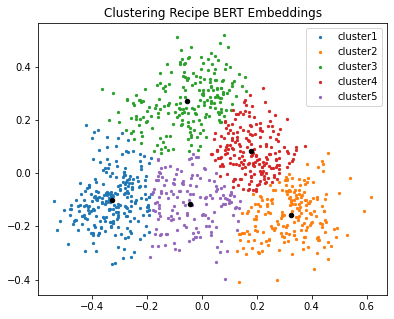

In [13]:
centroids = kmeans.cluster_centers_

#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = 'cluster'+str(i+1), s = 5)
print(df)
plt.title('Clustering Recipe BERT Embeddings')
fig = plt.gcf()
fig.set_size_inches(6.25, 5.0)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k')
plt.legend()
plt.show()